In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as seasonal_decompose

In [8]:
np.random.seed(0)
dates= pd.date_range(start='2022-01-01',end='2022-01-31')
values=np.arange(len(dates))*.2 + np.random.randn(len(dates))*50
ts=pd.Series(values,index=dates)


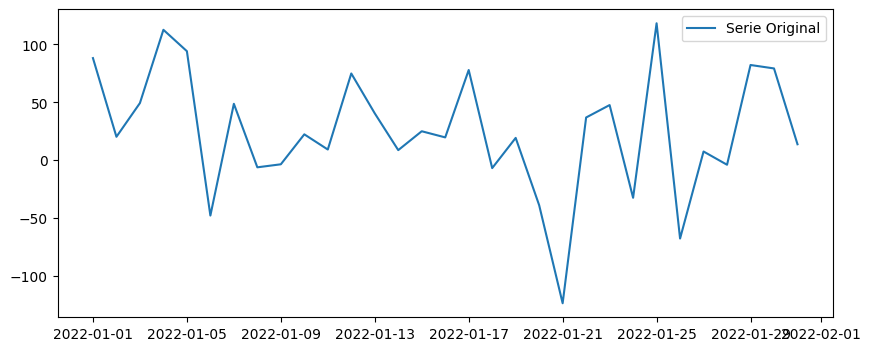

In [9]:
plt.figure(figsize=(10,4))
plt.plot(ts,label='Serie Original')
plt.legend()
plt.show()

In [10]:
descomposition=seasonal_decompose.seasonal_decompose(ts,model='additive')

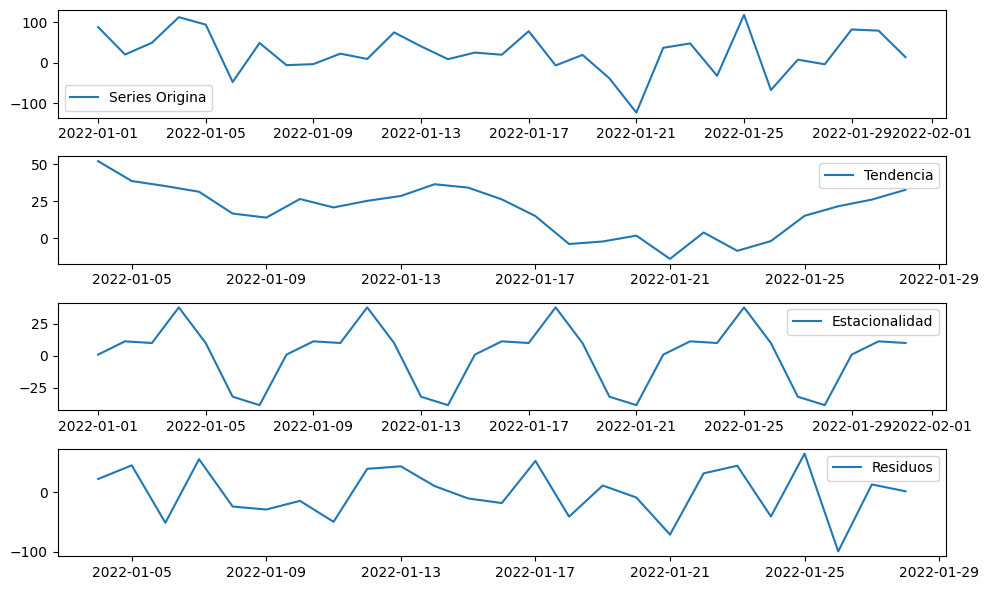

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(ts, label='Series Origina')
plt.legend()

plt.subplot(412)
plt.plot(descomposition.trend,label='Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(descomposition.seasonal,label='Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(descomposition.resid,label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()



In [12]:
###https://archive.ics.uci.edu/datasets
import pandas as pd
Time=pd.read_csv('timeseries.csv')
print(Time.head())
print(Time.columns)

         Date      A       B       C      D      E      F      G
0  2008-03-18  24.68  164.93  114.73  26.27  19.21  28.87  63.44
1  2008-03-19  24.18  164.89  114.75  26.22  19.07  27.76  59.98
2  2008-03-20  23.99  164.63  115.04  25.78  19.01  27.04  59.61
3  2008-03-25  24.14  163.92  114.85  27.41  19.61  27.84  59.41
4  2008-03-26  24.44  163.45  114.84  26.86  19.53  28.02  60.09
Index(['Date', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')


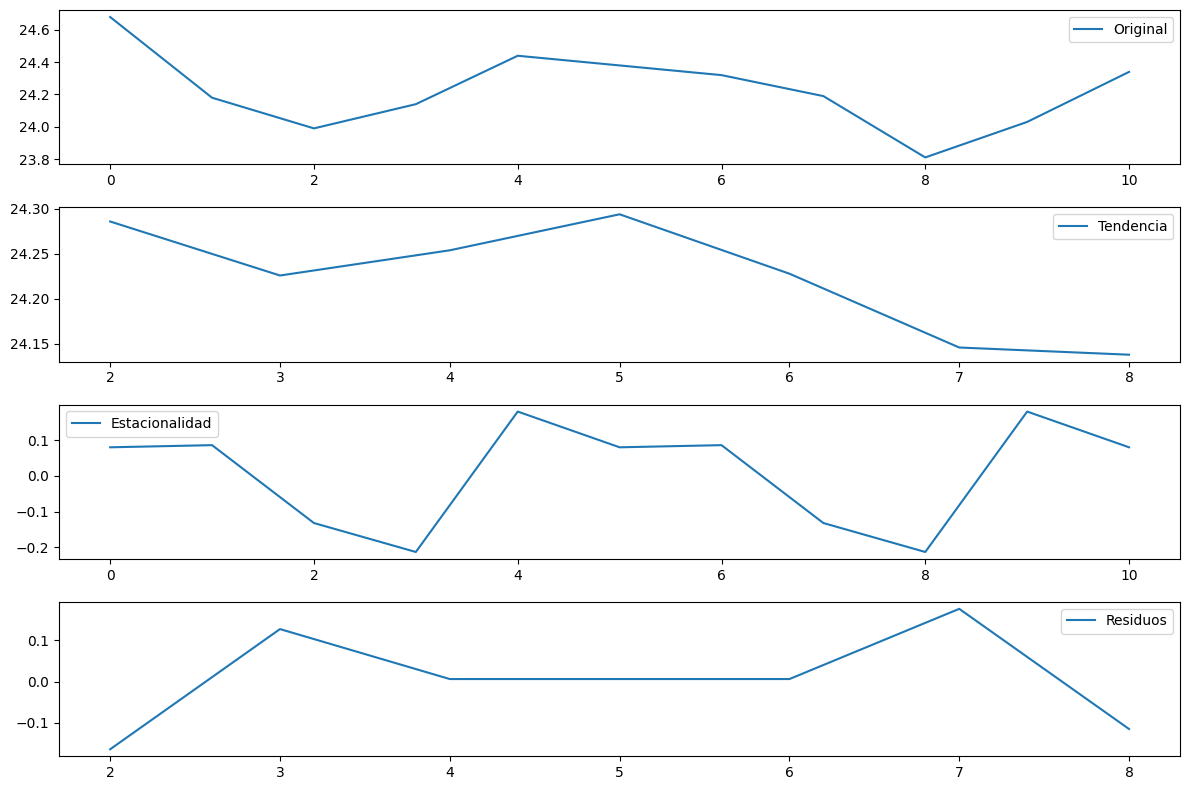

In [13]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Configura el período de la descomposición
period = int(len(Time) / 2)

# Choose a numeric column for decomposition, let's assume there's a column named 'Value'
# If you have a different numeric column, replace 'Value' with the actual column name
result = seasonal_decompose(Time['A'], model='additive', period=period)

# Grafica los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best') # Fixed the typo here
plt.subplot(412)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

1. Componente de Tendencia:

    Tendencia Creciente: Indica un aumento general en el valor de la serie temporal a lo largo del tiempo.
    Tendencia Decreciente: Indica una disminución general en el valor de la serie temporal a lo largo del tiempo.
    Tendencia Estacionaria: Indica que no hay un cambio significativo en el valor promedio de la serie temporal a lo largo del tiempo.
    Cambios en la Tendencia: Pueden indicar puntos de inflexión o cambios en el comportamiento de la serie temporal.

2. Componente Estacional:

    Patrones Repetitivos: Muestra patrones que se repiten a intervalos regulares (diarios, semanales, mensuales, etc.).
    Amplitud de la Estacionalidad: Indica la fuerza de la variación estacional. Una amplitud mayor significa una variación estacional más pronunciada.
    Cambios en la Estacionalidad: Pueden indicar cambios en los patrones estacionales a lo largo del tiempo.

3. Componente Residual:

    Ruido Aleatorio: Idealmente, los residuos deben ser ruido aleatorio sin patrones claros.
    Patrones en los Residuos: Si hay patrones en los residuos, puede indicar que el modelo no ha capturado completamente la estructura de la serie temporal.
    Heterocedasticidad: Si la varianza de los residuos cambia a lo largo del tiempo, puede indicar la necesidad de transformaciones o modelos más complejos.

Interpretación General:

    Combinación de Componentes: La serie temporal original es la suma de los componentes de tendencia, estacionalidad y residuos.
    Predicción: La descomposición ayuda a entender los patrones subyacentes en la serie temporal, lo que puede ser útil para la predicción.
    Toma de Decisiones: La interpretación de los componentes puede ayudar a tomar decisiones informadas en diferentes áreas.